In [ ]:
!pip install networkx
!pip install networkx matplotlib ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00


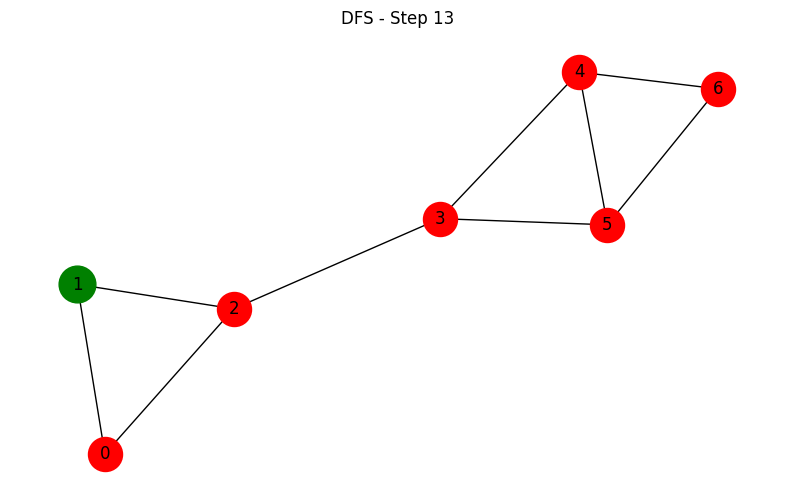

In [ ]:
# Depth For Search
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def dfs_with_animation(G, start):
    def dfs_step(node, visited=None, stack=None, steps=None):
        if visited is None:
            visited = set()
        if stack is None:
            stack = [start]
        if steps is None:
            steps = []

        if node not in visited:
            visited.add(node)
            steps.append(('visit', node))
            stack.extend(neighbor for neighbor in G[node] if neighbor not in visited)

        while stack:
            next_node = stack.pop()
            if next_node not in visited:
                steps.append(('backtrack', node))
                dfs_step(next_node, visited, stack, steps)

        if stack:
            steps.append(('backtrack', node))

        return steps

    return dfs_step(start)

def create_dfs_animation(G, start):
    pos = nx.spring_layout(G)
    steps = dfs_with_animation(G, start)

    fig, ax = plt.subplots(figsize=(10, 6))

    def update(frame):
        ax.clear()
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, ax=ax)

        visited = set()
        for step, node in steps[:frame+1]:
            if step == 'visit':
                visited.add(node)

        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=600, ax=ax)

        if frame < len(steps):
            current_step, current_node = steps[frame]
            if current_step == 'visit':
                nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='green', node_size=700, ax=ax)
            elif current_step == 'backtrack':
                nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='orange', node_size=700, ax=ax)

        ax.set_title(f"DFS - Step {frame + 1}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

# Example usage
G = nx.Graph([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)])
animation = create_dfs_animation(G, 0)
display(animation)

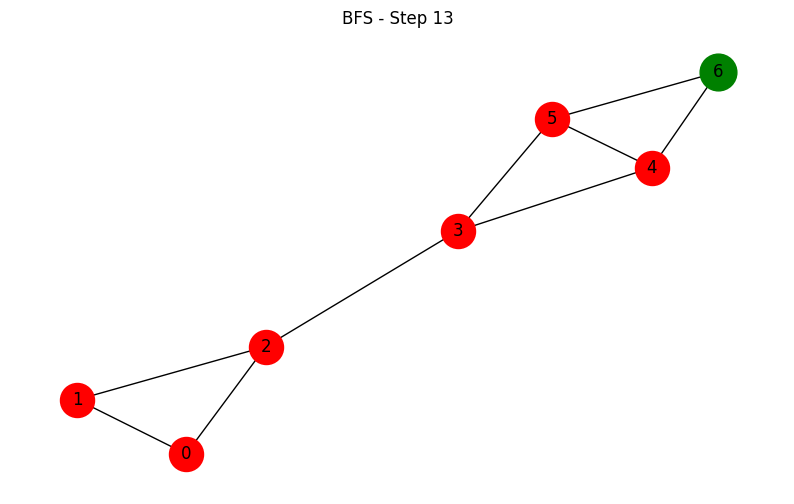

In [ ]:
#Breadth for search
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from collections import deque

def bfs_with_animation(G, start):
    visited = set([start])
    queue = deque([start])
    steps = []

    while queue:
        vertex = queue.popleft()
        steps.append(('visit', vertex))
        for neighbor in G[vertex]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                steps.append(('explore', vertex, neighbor))

    return steps

def create_bfs_animation(G, start):
    pos = nx.spring_layout(G)
    steps = bfs_with_animation(G, start)

    fig, ax = plt.subplots(figsize=(10, 6))

    def update(frame):
        ax.clear()
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, ax=ax)

        visited = set()
        for step in steps[:frame+1]:
            if step[0] == 'visit':
                visited.add(step[1])

        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=600, ax=ax)

        if frame < len(steps):
            current_step = steps[frame]
            if current_step[0] == 'visit':
                nx.draw_networkx_nodes(G, pos, nodelist=[current_step[1]], node_color='green', node_size=700, ax=ax)
            elif current_step[0] == 'explore':
                nx.draw_networkx_edges(G, pos, edgelist=[(current_step[1], current_step[2])], edge_color='r', width=2)

        ax.set_title(f"BFS - Step {frame + 1}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

# Example usage
G = nx.Graph([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)])
animation = create_bfs_animation(G, 0)
display(animation)

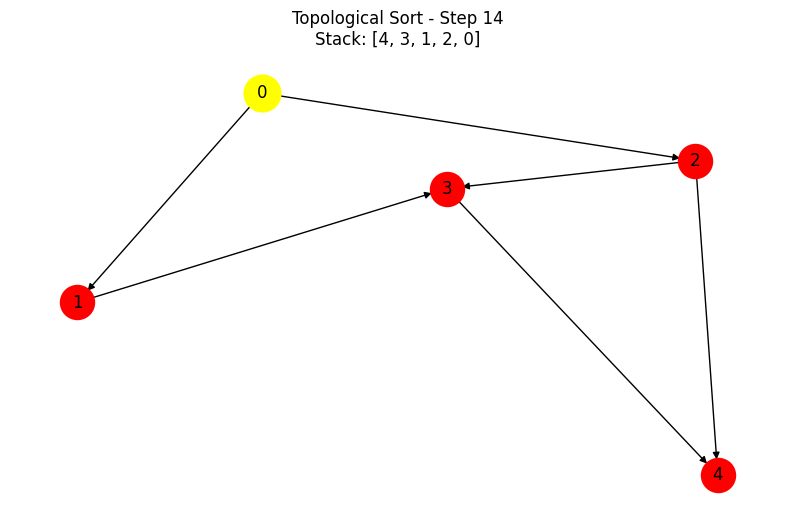

In [ ]:
# Topological Sort
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def topological_sort_with_animation(G):
    visited = set()
    stack = []
    steps = []

    def dfs(v):
        visited.add(v)
        steps.append(('visit', v))
        for neighbor in G[v]:
            if neighbor not in visited:
                steps.append(('explore', v, neighbor))
                dfs(neighbor)
        stack.append(v)
        steps.append(('add_to_stack', v))

    for node in G.nodes():
        if node not in visited:
            dfs(node)

    return steps, list(reversed(stack))

def create_topological_sort_animation(G):
    pos = nx.spring_layout(G)
    steps, sorted_nodes = topological_sort_with_animation(G)

    fig, ax = plt.subplots(figsize=(10, 6))

    def update(frame):
        ax.clear()
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, ax=ax)

        visited = set()
        stack = []
        for step in steps[:frame+1]:
            if step[0] == 'visit':
                visited.add(step[1])
            elif step[0] == 'add_to_stack':
                stack.append(step[1])

        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=600, ax=ax)

        if frame < len(steps):
            current_step = steps[frame]
            if current_step[0] == 'visit':
                nx.draw_networkx_nodes(G, pos, nodelist=[current_step[1]], node_color='green', node_size=700, ax=ax)
            elif current_step[0] == 'explore':
                nx.draw_networkx_edges(G, pos, edgelist=[(current_step[1], current_step[2])], edge_color='r', width=2)
            elif current_step[0] == 'add_to_stack':
                nx.draw_networkx_nodes(G, pos, nodelist=[current_step[1]], node_color='yellow', node_size=700, ax=ax)

        ax.set_title(f"Topological Sort - Step {frame + 1}\nStack: {stack}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

# Example usage
G = nx.DiGraph([(0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (2, 4)])
animation = create_topological_sort_animation(G)
display(animation)

# Why [4, 3, 1, 2, 0] is valid:

# 4 comes last because it depends on nodes 2 and 3
# 3 comes before 4 because 4 depends on it
# 1 comes before 3 because 3 depends on it
# 2 comes before both 3 and 4
# 0 comes first because both 1 and 2 depend on it

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


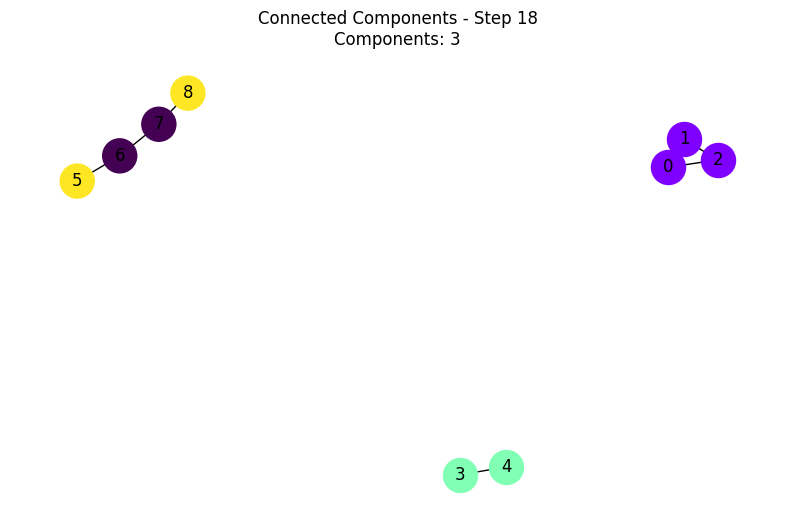

In [ ]:
# Connected Components
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

def connected_components_with_animation(G):
    visited = set()
    components = []
    steps = []

    def dfs(v, component):
        visited.add(v)
        component.append(v)
        steps.append(('visit', v))
        for neighbor in G[v]:
            if neighbor not in visited:
                steps.append(('explore', v, neighbor))
                dfs(neighbor, component)

    for node in G.nodes():
        if node not in visited:
            component = []
            dfs(node, component)
            components.append(component)
            steps.append(('new_component', component))

    return steps, components

def create_connected_components_animation(G):
    pos = nx.spring_layout(G)
    steps, components = connected_components_with_animation(G)

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, len(components)))

    def update(frame):
        ax.clear()
        nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=500, ax=ax)

        visited = set()
        current_components = []
        for step in steps[:frame+1]:
            if step[0] == 'visit':
                visited.add(step[1])
            elif step[0] == 'new_component':
                current_components.append(step[1])

        for i, component in enumerate(current_components):
            nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=colors[i], node_size=600, ax=ax)

        if frame < len(steps):
            current_step = steps[frame]
            if current_step[0] == 'visit':
                nx.draw_networkx_nodes(G, pos, nodelist=[current_step[1]], node_color='green', node_size=700, ax=ax)
            elif current_step[0] == 'explore':
                nx.draw_networkx_edges(G, pos, edgelist=[(current_step[1], current_step[2])], edge_color='r', width=2)

        ax.set_title(f"Connected Components - Step {frame + 1}\nComponents: {len(current_components)}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

# Example usage
G = nx.Graph([(0, 1), (0, 2), (1, 2), (3, 4), (5, 6), (6, 7), (7, 8)])
animation = create_connected_components_animation(G)
display(animation)

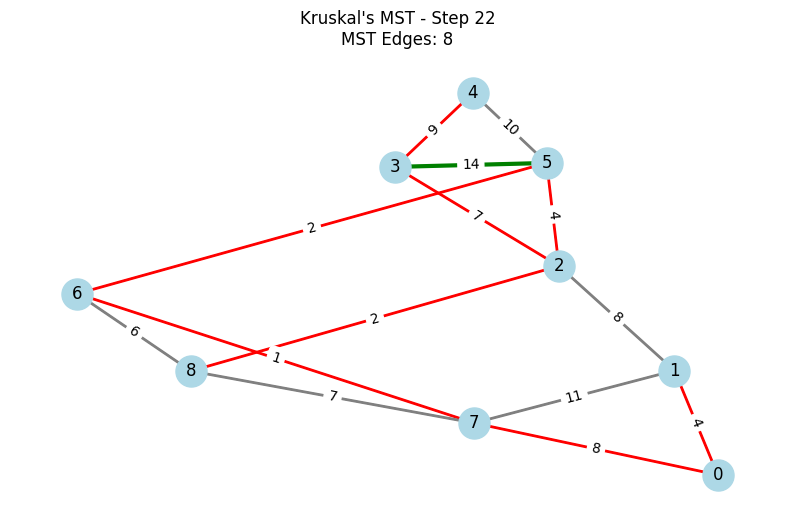

In [ ]:
#Kruskal's Algorithm
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class DisjointSet:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def find(self, item):
        if self.parent[item] != item:
            self.parent[item] = self.find(self.parent[item])
        return self.parent[item]

    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1

def kruskal_mst_with_animation(G):
    edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    ds = DisjointSet(G.nodes())
    mst = []
    steps = []

    for u, v, data in edges:
        steps.append(('consider', u, v))
        if ds.find(u) != ds.find(v):
            ds.union(u, v)
            mst.append((u, v, data.get('weight', 1)))
            steps.append(('add', u, v))

    return steps, mst

def create_kruskal_animation(G):
    pos = nx.spring_layout(G)
    steps, mst = kruskal_mst_with_animation(G)

    fig, ax = plt.subplots(figsize=(10, 6))

    def update(frame):
        ax.clear()
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, ax=ax)

        edge_colors = ['gray' for _ in G.edges()]
        current_mst = []
        for step in steps[:frame+1]:
            if step[0] == 'add':
                current_mst.append((step[1], step[2]))

        for i, edge in enumerate(G.edges()):
            if edge in current_mst or (edge[1], edge[0]) in current_mst:
                edge_colors[i] = 'r'

        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

        if frame < len(steps):
            current_step = steps[frame]
            if current_step[0] == 'consider':
                nx.draw_networkx_edges(G, pos, edgelist=[(current_step[1], current_step[2])], edge_color='g', width=3)

        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        ax.set_title(f"Kruskal's MST - Step {frame + 1}\nMST Edges: {len(current_mst)}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

# Example usage
G = nx.Graph()
edges = [
    (0, 1, {'weight': 4}), (0, 7, {'weight': 8}), (1, 2, {'weight': 8}), (1, 7, {'weight': 11}),
    (2, 3, {'weight': 7}), (2, 8, {'weight': 2}), (2, 5, {'weight': 4}), (3, 4, {'weight': 9}),
    (3, 5, {'weight': 14}), (4, 5, {'weight': 10}), (5, 6, {'weight': 2}), (6, 7, {'weight': 1}),
    (6, 8, {'weight': 6}), (7, 8, {'weight': 7})
]
G.add_edges_from(edges)
animation = create_kruskal_animation(G)
display(animation)

In [ ]:
#Prim's Algorithm
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import heapq

def prim_mst(G):
    start_node = list(G.nodes())[0]
    mst = []
    visited = set([start_node])
    edges = [(G[start_node][v]['weight'], start_node, v) for v in G[start_node]]
    heapq.heapify(edges)
    steps = []

    while edges:
        weight, u, v = heapq.heappop(edges)
        if v not in visited:
            visited.add(v)
            mst.append((u, v, weight))
            steps.append((list(visited), list(mst)))

            for next_node in G[v]:
                if next_node not in visited:
                    heapq.heappush(edges, (G[v][next_node]['weight'], v, next_node))

    return steps

def create_prim_animation(G):
    pos = nx.spring_layout(G)
    steps = prim_mst(G)

    fig, ax = plt.subplots(figsize=(12, 8))

    def update(frame):
        ax.clear()
        visited, mst_edges = steps[frame]

        # Draw all nodes and edges
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold', ax=ax)

        # Highlight visited nodes
        nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=500, ax=ax)

        # Highlight MST edges
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='r', width=2, ax=ax)

        # Draw edge labels
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

        ax.set_title(f"Prim's MST - Step {frame + 1}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    plt.close(fig)
    return anim

# Example usage
G = nx.Graph()
edges = [
    (0, 1, {'weight': 4}), (0, 7, {'weight': 8}), (1, 2, {'weight': 8}), (1, 7, {'weight': 11}),
    (2, 3, {'weight': 7}), (2, 8, {'weight': 2}), (2, 5, {'weight': 4}), (3, 4, {'weight': 9}),
    (3, 5, {'weight': 14}), (4, 5, {'weight': 10}), (5, 6, {'weight': 2}), (6, 7, {'weight': 1}),
    (6, 8, {'weight': 6}), (7, 8, {'weight': 7})
]
G.add_edges_from(edges)

# Create and display the animation
anim = create_prim_animation(G)
HTML(anim.to_jshtml())

In [ ]:
# Interactive widget
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets
import heapq

def bfs(G, start):
    visited = set([start])
    queue = [start]
    steps = [(list(visited), [])]

    while queue:
        node = queue.pop(0)
        for neighbor in G[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                steps.append((list(visited), [(node, neighbor)]))
    return steps

def dfs(G, start):
    visited = set()
    steps = []

    def dfs_recursive(node):
        visited.add(node)
        steps.append((list(visited), []))
        for neighbor in G[node]:
            if neighbor not in visited:
                steps[-1][1].append((node, neighbor))
                dfs_recursive(neighbor)

    dfs_recursive(start)
    return steps

def topological_sort(G):
    visited = set()
    stack = []
    steps = []

    def dfs(node):
        visited.add(node)
        for neighbor in G[node]:
            if neighbor not in visited:
                dfs(neighbor)
        stack.append(node)
        steps.append((list(visited), list(stack)))

    for node in G:
        if node not in visited:
            dfs(node)

    return steps[::-1]

def connected_components(G):
    def dfs(node, component):
        visited.add(node)
        component.append(node)
        for neighbor in G[node]:
            if neighbor not in visited:
                dfs(neighbor, component)

    visited = set()
    components = []
    steps = []

    for node in G:
        if node not in visited:
            component = []
            dfs(node, component)
            components.append(component)
            steps.append(list(components))

    return steps

def kruskal_mst(G):
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    parent = {node: node for node in G.nodes()}
    rank = {node: 0 for node in G.nodes()}

    def find(item):
        if parent[item] != item:
            parent[item] = find(parent[item])
        return parent[item]

    def union(x, y):
        xroot = find(x)
        yroot = find(y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    mst = []
    steps = []

    for edge in edges:
        u, v, attr = edge
        if find(u) != find(v):
            union(u, v)
            mst.append((u, v, attr['weight']))
            steps.append(list(mst))

    return steps

def prim_mst(G):
    start_node = list(G.nodes())[0]
    mst = []
    visited = set([start_node])
    edges = [(G[start_node][v]['weight'], start_node, v) for v in G[start_node]]
    heapq.heapify(edges)
    steps = []

    while edges:
        weight, u, v = heapq.heappop(edges)
        if v not in visited:
            visited.add(v)
            mst.append((u, v, weight))
            steps.append((list(visited), list(mst)))

            for next_node in G[v]:
                if next_node not in visited:
                    heapq.heappush(edges, (G[v][next_node]['weight'], v, next_node))

    return steps

def create_graph_from_edges(edges, directed=False):
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    for edge in edges:
        if len(edge) == 2:
            u, v = edge
            G.add_edge(u, v)
        elif len(edge) == 3:
            u, v, w = edge
            G.add_edge(u, v, weight=w)
    return G

def create_animation(G, steps, algorithm):
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots(figsize=(12, 8))

    def update(frame):
        ax.clear()
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold', ax=ax)

        if algorithm in ['BFS', 'DFS']:
            visited, current_edges = steps[frame]
            nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=500, ax=ax)
            nx.draw_networkx_edges(G, pos, edgelist=current_edges, edge_color='r', width=2, ax=ax)
        elif algorithm == 'Topological Sort':
            visited, sorted_nodes = steps[frame]
            nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=500, ax=ax)
            for i, node in enumerate(sorted_nodes):
                ax.annotate(f"Order: {len(sorted_nodes)-i}", xy=pos[node], xytext=(5,5), textcoords="offset points")
        elif algorithm == 'Connected Components':
            for i, component in enumerate(steps[frame]):
                nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=plt.cm.Set3(i), node_size=500, ax=ax)
        elif algorithm in ["Kruskal's MST", "Prim's MST"]:
            if algorithm == "Kruskal's MST":
                mst_edges = steps[frame]
            else:  # Prim's MST
                _, mst_edges = steps[frame]
            nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='r', width=2, ax=ax)

        if nx.get_edge_attributes(G, 'weight'):
            edge_labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)

        ax.set_title(f"{algorithm} - Step {frame + 1}")
        ax.axis('off')

    anim = FuncAnimation(fig, update, frames=len(steps), interval=1000, repeat=False)
    plt.close(fig)
    return anim

def run_algorithm(algorithm, graph, start_node=None):
    if algorithm == 'BFS':
        steps = bfs(graph, start_node)
    elif algorithm == 'DFS':
        steps = dfs(graph, start_node)
    elif algorithm == 'Topological Sort':
        steps = topological_sort(graph)
    elif algorithm == 'Connected Components':
        steps = connected_components(graph)
    elif algorithm == "Kruskal's MST":
        steps = kruskal_mst(graph)
    elif algorithm == "Prim's MST":
        steps = prim_mst(graph)

    anim = create_animation(graph, steps, algorithm)
    return HTML(anim.to_jshtml())

# Create widgets
algorithm_dropdown = widgets.Dropdown(
    options=['BFS', 'DFS', 'Topological Sort', 'Connected Components', "Kruskal's MST", "Prim's MST"],
    description='Algorithm:',
    disabled=False,
)

edge_input = widgets.Text(
    value='0-1-4,0-2-8,1-2-7,1-3-9,2-3-5',
    placeholder='Enter edges (e.g., 0-1-4,1-2-7 for weighted or 0-1,1-2 for unweighted)',
    description='Edges:',
    disabled=False
)

start_node_input = widgets.Text(
    value='0',
    placeholder='Enter start node (for BFS and DFS)',
    description='Start Node:',
    disabled=False
)

directed_checkbox = widgets.Checkbox(
    value=False,
    description='Directed Graph',
    disabled=False
)

run_button = widgets.Button(description="Run Algorithm")

output = widgets.Output()

# Define button click event
def on_button_clicked(b):
    with output:
        clear_output()
        edges = []
        for edge in edge_input.value.split(','):
            parts = edge.split('-')
            edges.append(tuple(map(int, parts)))

        graph = create_graph_from_edges(edges, directed_checkbox.value)
        start_node = int(start_node_input.value) if start_node_input.value else None

        animation = run_algorithm(algorithm_dropdown.value, graph, start_node)
        display(animation)

run_button.on_click(on_button_clicked)

# Display widgets
display(algorithm_dropdown, edge_input, start_node_input, directed_checkbox, run_button, output)

Dropdown(description='Algorithm:', options=('BFS', 'DFS', 'Topological Sort', 'Connected Components', "Kruskal…

Text(value='0-1-4,0-2-8,1-2-7,1-3-9,2-3-5', description='Edges:', placeholder='Enter edges (e.g., 0-1-4,1-2-7 …

Text(value='0', description='Start Node:', placeholder='Enter start node (for BFS and DFS)')

Checkbox(value=False, description='Directed Graph')

Button(description='Run Algorithm', style=ButtonStyle())

Output()